<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 2</h4>
<h4 align="center">

Questions 1, 2: [Ali Yousefi](https://t.me/BeNameBalasari), Questions 3, 4: [Mahshad Moradi](https://t.me/maahmoradi)

</h4>

## Question 1 ``(30 pt.)``
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
#function to get the result of polynomial fit
def PolyCoef(x, coeffs):
    l = len(coeffs)
    y = 0
    for i in range(l):
        y += coeffs[i] * x**i
    return y

dataset = pd.read_csv('arac.csv',sep=';')
K = [3,4,5]
BaseYear = 1966

In [4]:
x = np.matrix(dataset.Year[0:]).T - BaseYear
cars = np.matrix(dataset.Car[0:]).T
buses = np.matrix(dataset.Bus[0:]).T

Predicted Numbers for cars for K = 3
              Cars
2016  1.079113e+07
2017  1.135646e+07
2018  1.194129e+07
2019  1.254596e+07
2020  1.317080e+07
Predicted Numbers for cars for K = 4
              Cars
2016  1.085577e+07
2017  1.144644e+07
2018  1.206102e+07
2019  1.270020e+07
2020  1.336472e+07
Predicted Numbers for cars for K = 5
              Cars
2016  1.124644e+07
2017  1.206693e+07
2018  1.297318e+07
2019  1.397525e+07
2020  1.508399e+07


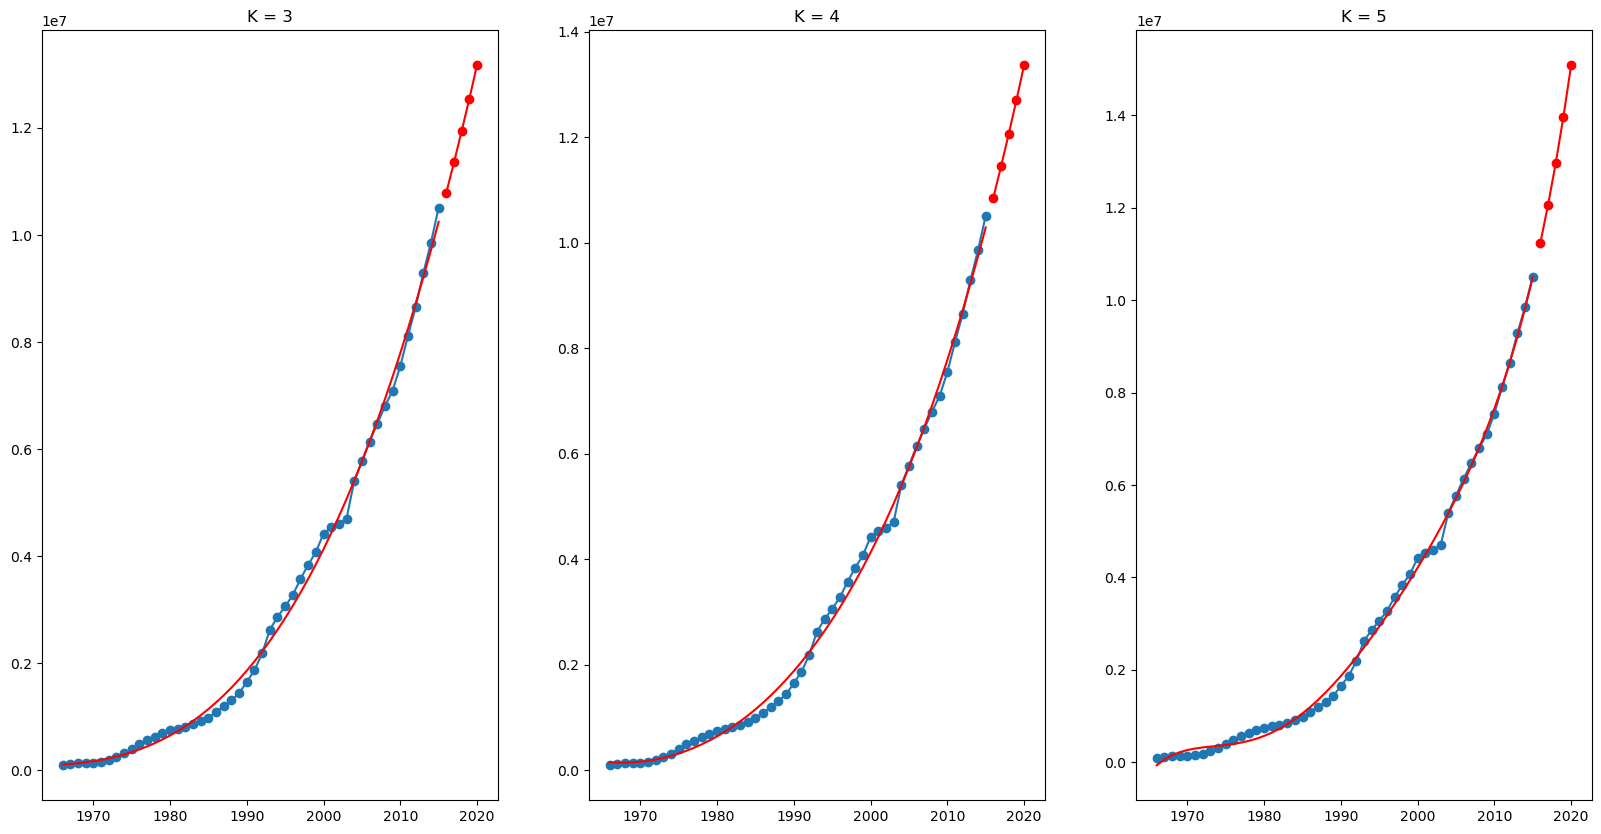

In [5]:

# In this part, change the value of K and show the results for "Cars"
# You may add new cells to show the results separately
# Create Vandermonde Matrix
plt.figure(figsize=(20,10))
i = 1
for k in K:
    A = np.hstack([np.power(x, i) for i in range(k + 1)])
    coefCars = np.linalg.lstsq(A, dataset['Car'], rcond=None)
    f1 = np.matrix(coefCars[0]).T
    # Prediction
    TargetYears = np.matrix([2016, 2017, 2018, 2019, 2020]).T
    A2 = np.hstack([np.power(TargetYears - BaseYear, i) for i in range(k + 1)])
    # Predict the number of cars for target years
    f2 = A2*f1
    #compare the previous datas with prediction
    A3 = np.hstack([np.power(x, i) for i in range(k + 1)])
    f3 = A3*f1
    # Plot the results
    plt.subplot(1,len(K),i)
    plt.plot(x + BaseYear, cars, 'o-')
    plt.plot(TargetYears, f2, 'ro-')
    plt.plot(x + BaseYear, f3, 'r')
    plt.title(f"K = {k}")
    print(f"Predicted Numbers for cars for K = {k}")
    predCars = pd.DataFrame(f2, index = ['2016', '2017', '2018', '2019', '2020'], columns = ['Cars'])
    print(predCars)
    i = i + 1


Predicted Numbers for Buses for K = 3
              Buses
2016  250684.753548
2017  260030.129904
2018  269525.793520
2019  279169.842333
2020  288960.374284
Predicted Numbers for Buses for K = 4
              Buses
2016  235522.286142
2017  238921.596849
2018  241442.068068
2019  242991.182803
2020  243473.067954
Predicted Numbers for Buses for K = 5
              Buses
2016  216376.739872
2017  208513.964565
2018  196740.249689
2019  180505.402766
2020  159217.735587


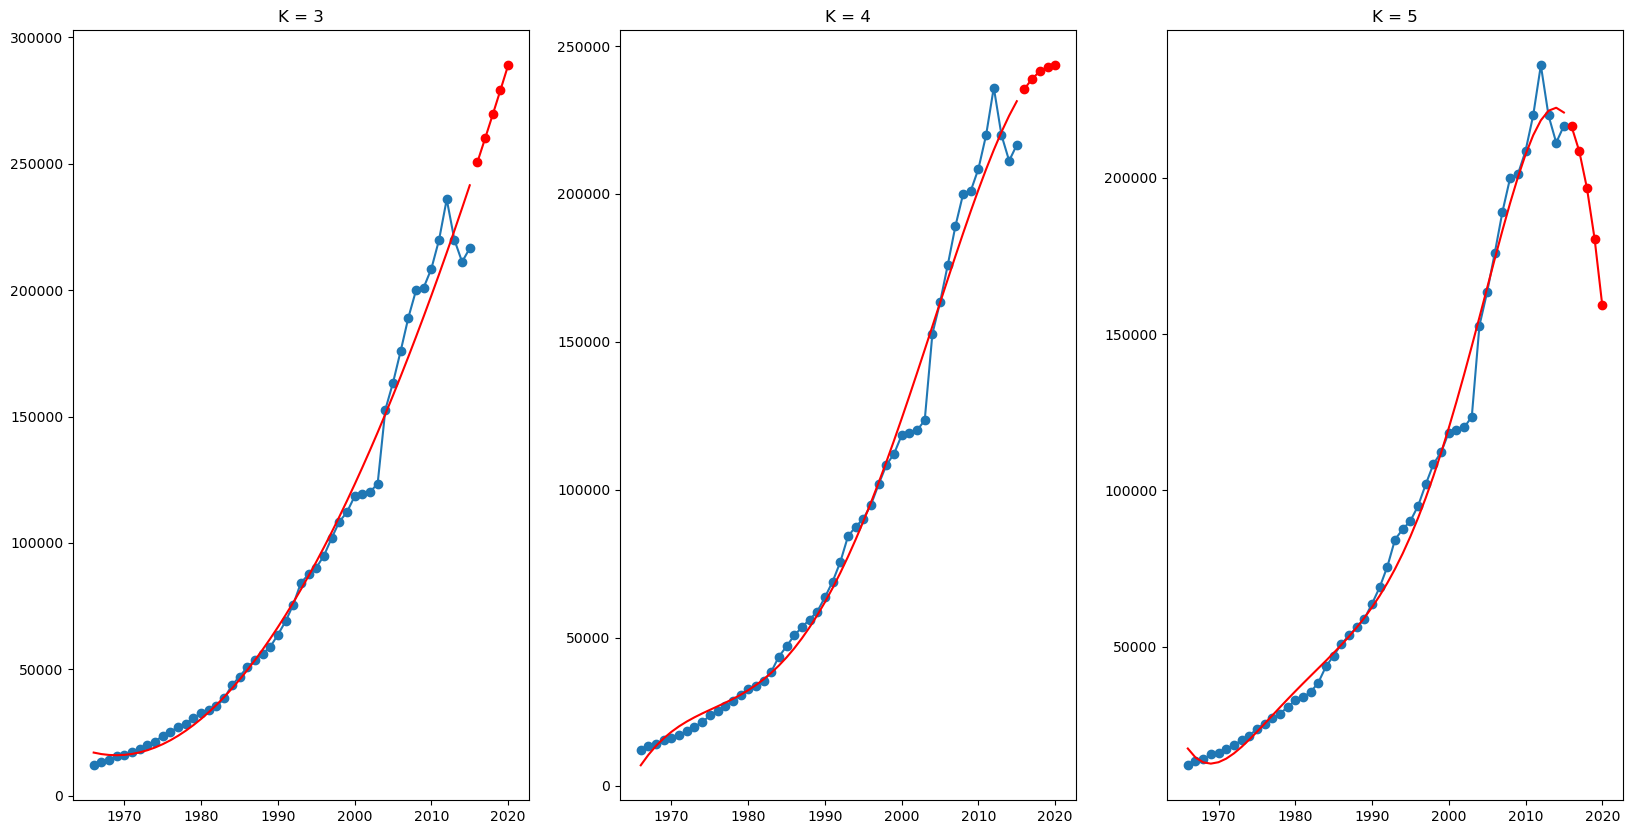

In [6]:
# In this part, change the value of K and show the results for "Buses"
# You may add new cells to show the results separately
plt.figure(figsize=(20,10))
i = 1
for k in K:
    A = np.hstack([np.power(x, i) for i in range(k + 1)])
    coefBuses = np.linalg.lstsq(A, dataset['Bus'], rcond=None)
    f1 = np.matrix(coefBuses[0]).T
    # Prediction
    TargetYears = np.matrix([2016, 2017, 2018, 2019, 2020]).T
    A2 = np.hstack([np.power(TargetYears - BaseYear, i) for i in range(k + 1)])
    # Predict the number of cars for target years
    f2 = A2*f1
    #compare the previous datas with prediction
    A3 = np.hstack([np.power(x, i) for i in range(k + 1)])
    f3 = A3*f1
    # Plot the results
    plt.subplot(1,len(K),i)
    plt.plot(x + BaseYear, buses, 'o-')
    plt.plot(TargetYears, f2, 'ro-')
    plt.plot(x + BaseYear, f3, 'r')
    plt.title(f"K = {k}")
    print(f"Predicted Numbers for Buses for K = {k}")
    predBuses = pd.DataFrame(f2, index = ['2016', '2017', '2018', '2019', '2020'], columns = ['Buses'])
    print(predBuses)
    i = i + 1

## Question 2 ``(30 pt.)``

As you learned in the course, the least squares method is a way of estimating a function given sample points $$(x_i, y_i), \quad  0 \leq i \leq n$$ with the assumption of linearity of the underlying function.
### step 1
Create n=10 sample points $(x_i, y_i)$ where $$y_i = 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $  . The x's should range from 0 to 5 and be evenly spaced (hint: use numpy's linspace function)
### step 2
Given the samples of the previous part, try to estimate a linear function that models the relationship between $x_i$'s and $y_i$'s using the least squares method (find a and b such that the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ is minimized)
### step 3
Plot the sample points and the line you estimated in the previous part in the same graph using matplotlib.
### step 4
Plot the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ as a function of n where $10\leq n \leq 50$ and a and b are the least squares estimates of the line $ax + b = y$.
### step 5
Repeat part 1 but this time create n=20 sample points with a quadratic term added to y: $$y_i = x^2_i + 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ has the same distribution as before and x's range from 0 to 5 likewise.
### step 6
Try to use the least squares method to estimate the coefficients of the quadratic function given the sample points of part 5 (hint: in the least squares method we minimze the norm of the error vector $||Ax-y||^2$. Add a column to matrix A for the quadratic terms and then try to minimize the error function using the least squares method).
### step 7
Repeat part 3 for the estimated quadratic function of the previous part.

Text(0, 30, 'y = 1.00$x^2$ + 2.00x + 2.52')

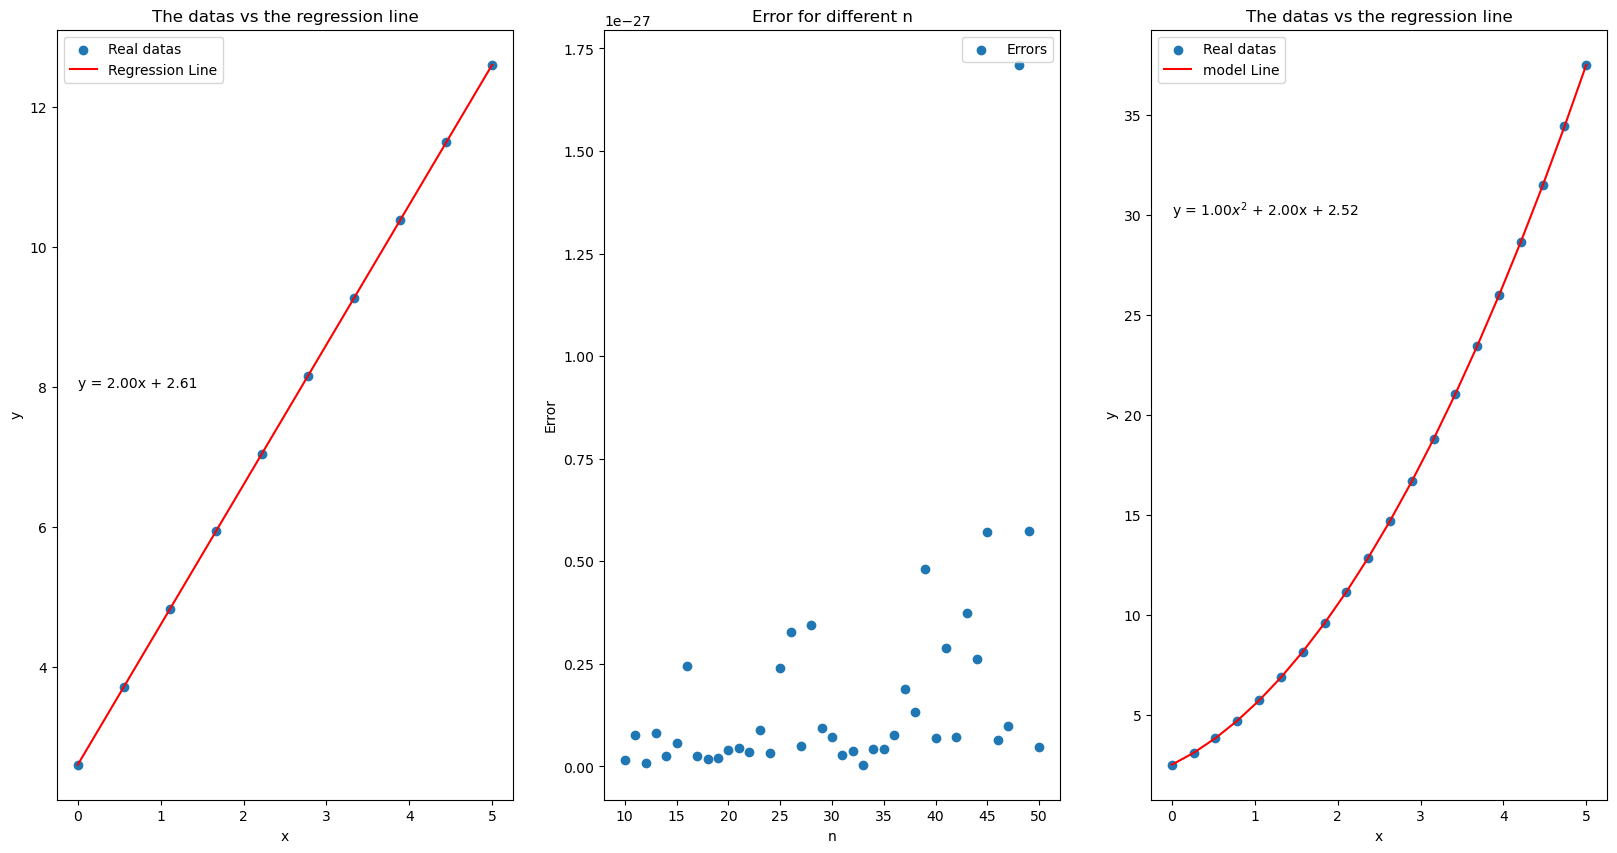

In [7]:
plt.figure(figsize=(20,10))

# Part 1
x = np.linspace(0, 5, num = 10)
x.sort()
y = 2*x + 3 + np.random.normal(0,1)

# Part 2
# finding the best regression line with the least squares (using np.linalg.lstsq like before)
model = np.linalg.lstsq(np.vstack([x,np.ones(len(x))]).T, y, rcond=None)
a, b = model[0]

# Part 3
# plotting the datas
plt.subplot(1,3,1)
plt.scatter(x, y, label="Real datas")
plt.plot(x, a * x + b, color='red', label="Regression Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title("The datas vs the regression line")
plt.legend()
plt.text(x = 0, y = 8, s=f"y = {a:.2f}x + {b:.2f}")

# Part 4
# defining the function to calculate the error for each n
def CalcError(n):
    x = np.linspace(0, 5, num = n)
    x.sort()
    y = 2*x + 3 + np.random.normal(0,1)
    model = np.linalg.lstsq(np.vstack([x,np.ones(len(x))]).T, y, rcond=None)
    a, b = model[0]
    return(sum((a*x + b - y)**2))
# creating the n values and errors
N = list(range(10,51))
Er = [CalcError(n) for n in N]
# plotting the errors for each n
plt.subplot(1,3,2)
plt.scatter(N, Er, label="Errors")
plt.xlabel('n')
plt.ylabel('Error')
plt.title("Error for different n")
plt.legend()

# Part 5 & 6 & 7
# creating the samples
x = np.linspace(0, 5, num = 20)
x.sort()
y = x**2 + 2*x + 3 + np.random.normal(0,1)
xm = np.matrix(x).T
# model the datas
A = np.hstack([np.power(xm, i) for i in range(3)])
coefs = np.linalg.lstsq(A, y, rcond=None)
# plotting the data
plt.subplot(1,3,3)
plt.scatter(x, y, label="Real datas")
plt.plot(x, coefs[0][2] * x ** 2 + coefs[0][1] * x + coefs[0][0], color='red', label="model Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title("The datas vs the regression line")
plt.legend()
plt.text(x = 0, y = 30, s=f"y = {coefs[0][2]:.2f}$x^2$ + {coefs[0][1]:.2f}x + {coefs[0][0]:.2f}")

## Question 3 ``(35 pt.)``

A structure's various components can be represented by a single **state vector**, which changes over time due to certain processes. This changing state vector, when modeled using linear transformations at discrete intervals, forms the basis of a **discrete dynamical system**.

Starting with an initial state $X_0$, transitions to subsequent states are governed by a matrix $P$, embodying linear transformations. For instance, $X_1 = PX_0$ marks the first transition, leading to a sequence where $X_2 = P^2X_0$, $X_3 = P^3X_0$, and so forth, generalizing to $X_t = PX_{t-1}$ for each time step $t$.

This approach is particularly effective in modeling web navigation, where each webpage's visit probability at any given time is captured by the state vector $X_t$. The transition matrix $P$ specifies the likelihood of moving from one page to another, with each element $p_{ij}$ representing the probability of transitioning from page $j$ to page $i$. To ensure the model's consistency, the sum of probabilities in each column of $P$ must equal one, reflecting the comprehensive distribution of navigating from any given page to the next.

In [8]:
## IMPORTS 
import numpy as np
import math
from scipy.sparse import csr_matrix
import scipy.linalg as scili

To illustrate with a small set of pages, say $n=5$, we construct matrix $P$ adhering to the principle that all diagonal elements are $0$, emphasizing no page links back to itself immediately. Additionally, to ensure that navigation probabilities from one page to another are properly distributed, the sum of the entries in each column of $P$ must equal one. Here's how such a matrix might look for $n=5$:

$$P=
\begin{bmatrix}
0 & 0.2 & 0.3 & 0.4 & 0.1 \\
0.3 & 0 & 0.2 & 0.1 & 0.4 \\
0.2 & 0.3 & 0 & 0.2 & 0.3 \\
0.1 & 0.2 & 0.4 & 0 & 0.1 \\
0.4 & 0.3 & 0.1 & 0.3 & 0.1
\end{bmatrix}$$

This configuration ensures a balanced probability distribution for transitions between pages, making our web navigation model realistic.

For the initial state vector $X_0$, where the browser starts at page $4$, $X_0$ would be a vector with its fourth entry as one and all others as zero, representing a 100% probability of starting from page 4.

Write a function to compute the navigation probabilities to all five pages after t transition. Then use the function to calculate a new vector $X_t$, representing the probabilities that the browser is on each of the five pages after following t links from the starting page. At last apply the function on $X_0$ assuming symmetric transition probabilities and t to be 10.

In [9]:
### START CODE HERE ###

P = [
    [0,0.2,0.3,0.4,0.1],
    [0.3,0,0.2,0.1,0.4],
    [0.2,0.3,0,0.2,0.3],
    [0.1,0.2,0.4,0,0.1],
    [0.4,0.3,0.1,0.3,0.1]
]

### END CODE HERE ###

In [10]:
### START CODE HERE ###
X0 = [[0],[0],[0],[1],[0]]

def Xt(t, X0):
    X = X0
    for i in range(t):
        X = np.dot(P, X)
    return X

print(Xt(10, X0))
### END CODE HERE ###

[[0.19180406]
 [0.20757166]
 [0.20330075]
 [0.16522473]
 [0.2320988 ]]


Predicting long-term visit probabilities, represented by $X_m$ for a large $m$, reveals which pages are likely to be frequented after extensive random navigation. However, repeatedly applying transformations to achieve this is computationally intensive. Leveraging eigenvalues and eigenvectors can substantially streamline the process, significantly minimizing the computational workload.

Find eigenvalues and eigenvectors for the previously defined matrix $P$.

In [11]:
### START CODE HERE ###
eigenvalues, eigenvectors = np.linalg.eig(P)
print("eigenvalues : ", eigenvalues)
print("eigenvectors : ", eigenvectors)
### END CODE HERE ###

eigenvalues :  [ 1.        +0.j         -0.15765017+0.25793924j -0.15765017-0.25793924j
 -0.25755543+0.j         -0.32714423+0.j        ]
eigenvectors :  [[-0.42636443+0.j          0.54212868+0.j          0.54212868-0.j
  -0.41107073+0.j          0.17711093+0.j        ]
 [-0.4613977 +0.j         -0.45321696-0.16110887j -0.45321696+0.16110887j
  -0.55741775+0.j         -0.82959181+0.j        ]
 [-0.45192925+0.j         -0.24724677+0.1558109j  -0.24724677-0.1558109j
  -0.03871143+0.j          0.34062401+0.j        ]
 [-0.36728128+0.j          0.21172414+0.41594989j  0.21172414-0.41594989j
   0.42750163+0.j         -0.08465115+0.j        ]
 [-0.51593599+0.j         -0.05338909-0.41065191j -0.05338909+0.41065191j
   0.57969828+0.j          0.39650803+0.j        ]]


A **Markov matrix** is characterized by its square shape, nonnegative entries, and the property that the sum of the elements in each column equals $1$. A key attribute of Markov matrices is that they always possess an eigenvalue of $1$. 

Given that matrix $P$ is designed as a Markov matrix, it naturally includes an eigenvalue of $1$. This feature allows us to express the equation $X_m = PX_{m-1}$ in a simplified form as $PX_{m-1} = 1 \times X_m$. For long-term probability predictions within $X_m$, identifying an eigenvector associated with the eigenvalue $1$ is crucial. This is because it leads to the simplified equation $PX = X$, facilitating the determination of steady-state probabilities without extensive computations.

After doing so check if your answer satisfies the equation with proper code. (use np.isclose)

In [12]:
### START CODE HERE ###
index = np.argmin(np.abs(eigenvalues-1))
oneVec = eigenvectors[:, index]
oneVec = oneVec / np.sum(oneVec)
print("Eigenvector corresponding to the 1 eigenvalue: ", oneVec)
PX = np.dot(P, oneVec)
print("Is X = PX ?", np.isclose(PX, oneVec).all())
oneVec = np.real(oneVec)
### END CODE HERE ###

Eigenvector corresponding to the 1 eigenvalue:  [0.19180475-0.j 0.20756485-0.j 0.20330536-0.j 0.16522554-0.j
 0.2320995 -0.j]
Is X = PX ? True


Explain the above results : \
The check whether PX=X holds was true, indicating that the computed eigenvector is indeed the steady state vector for this transition matrix. This means that no matter the initial state, as the system evolves, it will converge to this distribution of probabilities across the states represented by the matrix P.

Make sure that your vector satisfies the probability vector criteria.

In [13]:
### START CODE HERE ###

X_inf = np.tile(oneVec.reshape(-1, 1), (1, 5))

### END CODE HERE ###

print("Probabilities being at each of the pages:\n" + str(X_inf))

Probabilities being at each of the pages:
[[0.19180475 0.19180475 0.19180475 0.19180475 0.19180475]
 [0.20756485 0.20756485 0.20756485 0.20756485 0.20756485]
 [0.20330536 0.20330536 0.20330536 0.20330536 0.20330536]
 [0.16522554 0.16522554 0.16522554 0.16522554 0.16522554]
 [0.2320995  0.2320995  0.2320995  0.2320995  0.2320995 ]]


In a more realistic model of the web, some pages may not have outbound links (dangling nodes), and users may sometimes choose to navigate to a random page rather than following an outbound link. The Google PageRank algorithm introduces a damping factor to model this behavior, making the Markov process more reflective of real-world web navigation.

Dangling nodes are pages without outbound links. These nodes would lead to columns of zeros in the transition matrix, which is problematic for calculating the steady state. To address this, distribute the probability mass of dangling nodes equally among all pages.

First identify dangling nodes then adjust the transition matrix $P$ by redistributing the dangling nodes' probability mass equally across all pages, ensuring every column sums to 1.

In [14]:
# Example transition matrix for a small web model, including a dangling node
# Assume 4 pages, with the 4th page being a dangling node
P = np.array([
    [0, 0, 0, 0, 0],     # Probabilities from each page to Page 1
    [1, 0, 0.5, 0, 0],   # Probabilities from each page to Page 2
    [0, 0, 0, 0.5, 0],   # Probabilities from each page to Page 3
    [0, 1, 0.5, 0, 0],   # Probabilities from each page to Page 4
    [0, 0, 0, 0.5, 0]    # Page 5 is a dangling node
])

### START CODE HERE ###

dangling_nodes = np.sum(P, axis=0) == 0
redistribution = dangling_nodes / 5
P_adjusted = P + redistribution
# Normalize columns to sum to 1
P_adjusted = P_adjusted / np.sum(P_adjusted, axis=0)
P_adjusted
### END CODE HERE ###

array([[0. , 0. , 0. , 0. , 0.2],
       [1. , 0. , 0.5, 0. , 0.2],
       [0. , 0. , 0. , 0.5, 0.2],
       [0. , 1. , 0.5, 0. , 0.2],
       [0. , 0. , 0. , 0.5, 0.2]])

The damping factor models the behavior of web surfers who occasionally jump to a random page instead of following outbound links. This factor, usually set to 0.85, balances between following links ($P$) and jumping at random ($\frac{1}{n}$, where \(n\) is the number of pages).

Apply the damping factor $d$ to the transition matrix $P$ to get $P' = dP + \frac{1-d}{n}E$, where $E$ is an $n \times n$ matrix with all elements equal to $\frac{1}{n}$.

In [15]:
### START CODE HERE ###
E = np.ones((5,5))
Pnew = 0.85 * P + (0.15 / 5) * E
Pnew
### END CODE HERE ###

array([[0.03 , 0.03 , 0.03 , 0.03 , 0.03 ],
       [0.88 , 0.03 , 0.455, 0.03 , 0.03 ],
       [0.03 , 0.03 , 0.03 , 0.455, 0.03 ],
       [0.03 , 0.88 , 0.455, 0.03 , 0.03 ],
       [0.03 , 0.03 , 0.03 , 0.455, 0.03 ]])

The steady state distribution with the damping factor reflects a more realistic scenario of web page navigation. Finding this distribution involves solving for the principal Eigenvector of the modified transition matrix $P'$.

Use linear algebra techniques to compute the Eigenvector corresponding to the Eigenvalue of 1 for the modified matrix $P'$.
Normalize this Eigenvector to represent the steady-state distribution of page ranks.

In [16]:
### START CODE HERE ###

P_prime = Pnew
# Initial guess for the eigenvector
x = np.random.rand(P_prime.shape[0])
x /= np.sum(x)  # Normalize the initial vector

# Power method to find the dominant eigenvector
for _ in range(10000):
    x_new = np.dot(P_prime, x)
    x_new /= np.sum(x_new)  # Normalize the vector after each multiplication
    if np.allclose(x, x_new, atol=1e-10):  # Check for convergence
        break
    x = x_new

print("Eigenvector corresponding to eigenvalue 1 (normalized):")
print(x)

### END CODE HERE ###

Eigenvector corresponding to eigenvalue 1 (normalized):
[0.03674194 0.18735685 0.21587466 0.3441519  0.21587466]


Real-world web link structures can be vast, resulting in large, sparse transition matrices. Direct computation methods become impractical, necessitating efficient computational strategies.

Represent the transition matrix $P$ and modifications using sparse matrix techniques to handle large datasets. Then implement an iterative method, such as the power iteration algorithm, to find the principal Eigenvector efficiently.

In [17]:
### START CODE HERE ###

data = [0.2, 0.3, 0.4, 1.0, 0.2, 0.8, 0.5, 0.2, 0.4, 0.1]
rows = [0, 0, 0, 1, 1, 2, 2, 2, 2, 4]
cols = [1, 2, 3, 0, 2, 1, 2, 3, 3, 0]
n = 5

# Create sparse matrix
P = csr_matrix((data, (rows, cols)), shape=(n, n))

# Handle dangling nodes by adding uniform distribution to all entries
dangling_nodes = np.ravel(P.sum(axis=0) == 0)
d = 0.85  # damping factor
teleport = np.ones(n) / n
P += csr_matrix((teleport, (np.zeros(n), np.arange(n))), shape=(n, n))

# Apply damping factor
P = d * P + (1 - d) * (teleport[:, None] @ np.ones((1, n)))

# Power Iteration to find principal eigenvector
x = np.random.rand(n)
x /= x.sum()

for _ in range(1000):
    x_new = np.dot(x, P)
    x_new /= x_new.sum()
    if np.allclose(x, x_new):
        break
    x = x_new

print("Principal Eigenvector:")
print(x)



### END CODE HERE ###

Principal Eigenvector:
[[0.23741941 0.23362843 0.23385723 0.23415397 0.06094096]]


Given the transition matrix below, complete the function pagerank to handel the normalization of the matrix, apply damping and find its corresponding steady state vector.

In [18]:
def pageRank(X):
    ### START CODE HERE ###
    # Doing all the previous parts
    n = np.shape(X)[0]
    dangling_nodes = np.sum(X, axis=0) == 0
    redistribution = dangling_nodes / 5
    P_adjusted = X + redistribution
    P_adjusted = P_adjusted / np.sum(P_adjusted, axis=0)
    
    E = np.ones((n,n))
    Pnew = 0.85 * P_adjusted + (0.15 / n) * E
    P_prime = Pnew
    
    x = np.random.rand(P_prime.shape[0])
    x /= np.sum(x)
    
    for _ in range(10000):
        x_new = np.dot(P_prime, x)
        x_new /= np.sum(x_new)
        if np.allclose(x, x_new, atol=1e-10):
            break
        x = x_new
    steadystatevector = x
    ### END CODE HERE ###
    return steadystatevector 

matrix2 = [ [0, 0, 1, 0, 0, 0, 0, 0],
            [1, 0, 0, 1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 1],
            [0, 0, 0, 1, 1, 0, 0, 1],
            [0, 0, 0, 0, 0, 1, 0, 0]  ]
print("\n2) matrix 2 = ", matrix2)
print("steady state vector: ")
print(pageRank(matrix2))
# expected output: [0.03037, 0.0536, 0.02735, 0.0617, 0.1621, 0.2836, 0.2419, .1393]


2) matrix 2 =  [[0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0]]
steady state vector: 
[0.0303766  0.05360745 0.0273567  0.06176647 0.16206272 0.28360071
 0.2419498  0.13927955]


## Question 4 ``(35 pt.)``

Auto-regressive (AR) models are fundamental in signal processing for modeling time series data. An AR model predicts future values based on a linear combination of past values. Mathematically, it's represented as 
$$
\hat{y}[t] = \sum_{i=1}^{p} a_i y[t-i]
$$, 
where $\hat{y}[t]$ is the predicted value at time $t$, $y[t-i]$ are the past values, and $a_i$ are the coefficients that need to be determined. Cross-regressive models extend this concept by modeling the relationship between two different time series, predicting values of one series using past values of another.

Load the data, qbo.txt. This consists of three data streams from temperature readings associated with the Quasi-Biennial Oscillation (QBO), sampled at one month intervals. These are shown below.


<!-- ![alt text](QBO.png) -->

<div style="text-align: center;">
    <img src="QBO.png" alt="alt text" width="600" height="500">
</div>

In [19]:
## IMPORTS
import numpy as np
import matplotlib.pyplot as plt

In [20]:
### START CODE HERE ###

File_data = np.loadtxt("qbo.txt", dtype=float)
time_series1 = File_data[:,0]
time_series2 = File_data[:,1]
time_series3 = File_data[:,2]
File_data


### END CODE HERE ###

array([[ -89., -331., -163.],
       [ -98., -332., -156.],
       [ -95., -320., -229.],
       ...,
       [-100.,   76.,   24.],
       [  20.,   90.,   16.],
       [ 103.,  123.,   25.]])

Formulate the AR model for the first time series. Define the order of the model $p$, which represents how many past values will be considered to predict the current value. The choice of $p$ can significantly affect model performance.

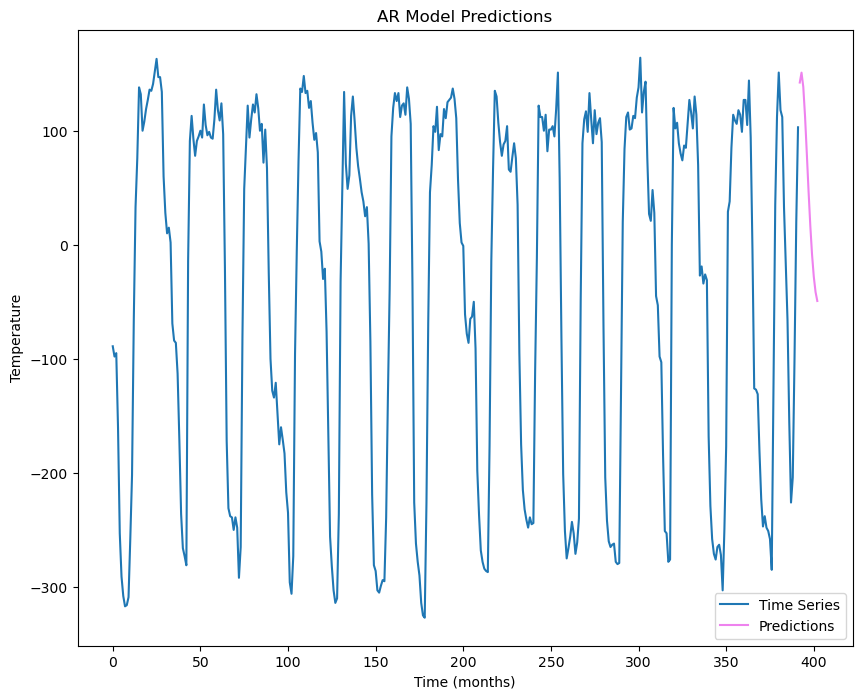

In [33]:
### START CODE HERE ###
from statsmodels.tsa.ar_model import AutoReg
# We choose p = 4 based on calculation
p = 4

model = AutoReg(time_series1, lags=p)
model_fit = model.fit()

# Making predictions and plotting the results and the original time series
predictions = model_fit.predict(start=len(time_series1), end=len(time_series1) + 10)
plt.figure(figsize=(10, 8))
plt.plot(time_series1, label='Time Series')
plt.plot(range(len(time_series1), len(time_series1) + len(predictions)), predictions, label='Predictions', color='violet')
plt.title('AR Model Predictions')
plt.xlabel('Time (months)')
plt.ylabel('Temperature')
plt.legend()

### END CODE HERE ###

Construct an embedding matrix from lagged versions of the data series. This matrix, often denoted as $M$, captures the structure of dependencies in past values. Use the pseudo-inverse of $M$ to solve for the coefficients $a_i$ that minimize the prediction error in a least squares sense.

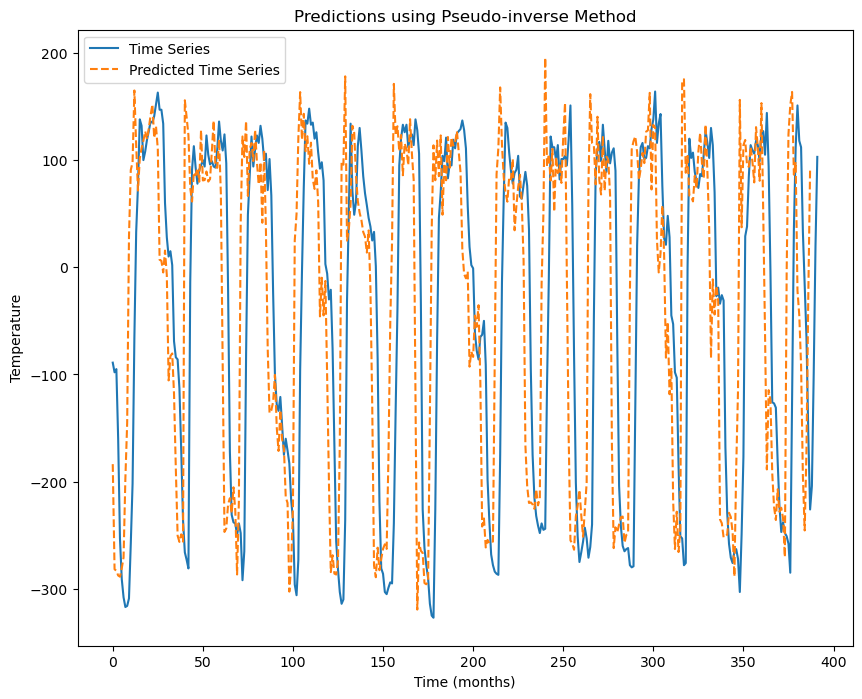

In [36]:
### START CODE HERE ###

# Creating the embedding matrix M and the target vector y
n = len(time_series1)
M = np.zeros((n - p, p))
y = time_series1[p:]
for i in range(p):
    M[:, i] = time_series1[p - i - 1:n - i - 1]

# Computing the pseudo-inverse of M
M_pseudo_inverse = np.linalg.pinv(M)

# finding the coefficients a_i
a = np.dot(M_pseudo_inverse, y)

# Predicting using the new method
y_pred = np.dot(M, a)

plt.figure(figsize=(10, 8))
plt.plot(time_series1, label='Time Series')
plt.plot(y_pred, label='Predicted Time Series', linestyle='--')
plt.legend()
plt.title('Predictions using Pseudo-inverse Method')
plt.xlabel('Time (months)')
plt.ylabel('Temperature')
plt.show()

### END CODE HERE ###

Assess the fitted model by comparing the predicted values against actual values using metrics such as the Mean Squared Error (MSE) or the coefficient of determination ($R^2$).

In [23]:
### START CODE HERE ###


### END CODE HERE ###

**Cross-regression**  - Modify the embedding matrix method, so that p

$$
\hat{y}[t] = \sum_{i=1}^{p} a_i z[t-i]
$$, 

in which y is being modelled by observing another timeseries, z. The coefficients of this model now describe the cross- regression i.e. how the past of z effects the present value of y. We can look at the magnitude of the coefficients as well as the predictions of y to give an idea about the information that ‘flows’ from z to y. Do any of the timeseries have strong interactions? If so, is there any indication of which one is driving which?

In [24]:
### START CODE HERE ###


### END CODE HERE ###

Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 128 by 128, then display the image using matplotlib.pyplot

Do not forget to convert RGB to gray to reduce the 3 color channels to one

In [25]:
### START CODE HERE ###


### END CODE HERE ###

In [26]:
from pygsp import graphs, filters, plotting

In [27]:
### do not edit this cell 
G = graphs.Grid2d(128,128)
L = G.L

Flatten the grayscale image into a vector. Apply the filter by multiplying $L$ with the flattened image vector: $x_{filtered} = Lx$. Reshape $x_{filtered}$ back to the original image dimensions.

Display the filtered image.

In [28]:
### START CODE HERE ###


### END CODE HERE ###

Formulate the inverse problem as a least squares problem. Then solve the inverse problem to get the reconstructed image. Finally display the original, filtered and the reconstructed images in a subplot. Use $\textbf{lsqr}$ from $\textbf{scipy.sparse.linalg}$ to solve least squares knowing that L is in sparse format. 

In [29]:
### START CODE HERE ###


### END CODE HERE ###